# OMA : Stochastic first order methods


## 1 -  Cross entropy loss on single Layer NN with SoftMax


Let's consider a classification problem with $m$ classes and $m$ parameters, which we want to process using a basic neural network consisting of a linear layer to which we apply softmax. The figure below shows the corresponding graphcite{https://towardsdatascience.com/deep-dive-into-softmax-regression-62deea103cb8}

<center>
    <figure>
        <img src="./img/SLSFM.png" alt="Network" width = "500" height="300">
        <figcaption>Graphe du réseau de neurones[1].</figcaption>
    </figure>
</center>



We begin by defining the cross entropy loss function:
$$ \mathcal{L}=\mathcal{L}_{\operatorname{CrossEntropy}} -\sum_{t=1}^k y_t \log \hat{y}_t $$
avec (softmax):
 $$\hat{y}_t = \frac{e^{z_t}}{\sum_{p=1}^k e^{z_p}}$$

Using the chain rule, we obtain $\forall (i,j) \in (\lbrace 1,...,k \rbrace )\times (\lbrace 1,...,m\rbrace) $ : 


$$ \frac{\partial \mathcal{L}}{\partial w_{ji}} = \frac{\partial \mathcal{L}}{\partial z_i} \frac{\partial z_i}{\partial w_{ji}} $$
et 
$$ \frac{\partial \mathcal{L}}{\partial b_i} = \frac{\partial \mathcal{L}}{\partial z_i} \frac{\partial z_i}{\partial b_i} $$

À partir de la définition de l'unité de pré-activation $ z_i =x_j w_{ji} + b_j $, nous obtenons :
$$ \frac{\partial z_i}{\partial w_{ji}} = x_j $$

$$ \frac{\partial z_i}{\partial b_{i}} = 1 $$

Calculons maintenant $ \frac{\partial \mathcal{L}}{\partial z_i} $. Cette expression est un peu plus délicate à calculer car $ z_i $ ne contribue pas seulement à $ \hat{y}_i $ mais à tous $ \hat{y}_k $ en raison du terme de normalisation $ (\sum_t e^{z_{t}}) $ dans $ \hat{y}_k = \frac{e^{z_k}}{\sum_t e^{z_t}} $.



$$ \frac{\partial \mathcal{L}}{\partial z_i} = \frac{\partial \mathcal{L}}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial z_i} + \sum_{t \neq i}^k \frac{\partial \mathcal{L}}{\partial \hat{y}_t} \frac{\partial \hat{y}_t}{\partial z_i} $$

Le gradient de la perte par rapport à la sortie $ \hat{y}_i $ est :
$$ \frac{\partial \mathcal{L}}{\partial \hat{y}_i} = -y_i \frac{1}{\hat{y}_i} $$

Calculons maintenant $ \frac{\partial \hat{y}_i}{\partial z_i} $ en utilisant la définition de la fonction softmax :

$$ \frac{\partial \hat{y}_i}{\partial z_i} = \hat{y}_i (1 - \hat{y}_i) $$

Pour $ t \neq i $, le gradient par rapport à $ z_i $ est :
$$ \frac{\partial \hat{y}_t}{\partial z_i} = -\hat{y}_t \hat{y}_i $$

Remplaçons les résultats ci-dessus :
$$ \frac{\partial \mathcal{L}}{\partial z_i} = -y_i \hat{y}_i (1 - \hat{y}_i) + \sum_{t \neq i} -y_t \hat{y}_t \hat{y}_i $$

Simplifions davantage :
$$ \frac{\partial \mathcal{L}}{\partial z_i} = -y_i + y_i \hat{y}_i + \sum_{t \neq i} y_t \hat{y}_i $$

$$ \frac{\partial \mathcal{L}}{\partial z_i} = \hat{y}_i \left( \sum_t y_t \right) - y_i $$

Finalement, nous obtenons le gradient par rapport à $ w_{ji} $ :
$$ \frac{\partial \mathcal{L}}{\partial w_{ji}} = x_j (\hat{y}_i - y_i) $$
et donc $$\nabla \mathcal{L}_\textbf{W}=\textbf{X}^\top(\mathbf{\hat{y}} - \mathbf{y})$$


Enfin, en se rappelant que $$ \frac{\partial z_i}{\partial b_i}=1$$  il vient $$ \nabla \mathcal{L}_{\mathbf{b}} = \mathbf{I}^\top(\mathbf{\hat{y}} - \mathbf{y})$$


This gives the gradient of the cross-entropy loss with respect to the linear network weights, followed by the softmax function for all observations.
We can now use our gradient descent algorithms to refine our neural network.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import sklearn as sk
from sklearn.datasets import make_regression
from tqdm import tqdm

### Generating data

In order to generate regression datasets, we will use a dataset generation function from the wellknown \texttt{scikit-learn} machine learning python environment. The function documentation is available at  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html.

Create (by filling in the code below) a python function that will apply this function in order generate a datasets of $n$ samples of dimension $d$ (number of features).


In [154]:
import numpy as np

from sklearn.datasets import make_classification

num_classes = 10
num_samples = 6000
num_features = 100


X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=num_features,
    n_redundant=0,
    n_classes=num_classes,
    random_state=42
)

# make classification renvoie un vecteur y de la forme [1,0,2,0,....] 
#Ici on transforme y (one hot encoding) pour qu'il puisse être utilisé dans le caclul du gradient
y=np.eye(num_classes)[y]

### Computing $f(x^*)$
Ici nous n'avons pas de moyen direct pour calculer $x^\star$!


### Benchmark: gradient descent

In [188]:
def network_output(X,W,b):
    Z = np.dot(X, W)+b
    exp_Z = np.exp(Z)
    network_output = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return network_output


def cross_entropy_loss(X,W,b,y):
    y_hat = network_output(X,W,b)
    cross_entropy_loss = -np.sum(y * np.log(y_hat)) / len(X)
    return cross_entropy_loss


def grad_cross_entropy(X,W,b,y):
    y_hat = network_output(X,W,b)
    gradient_W = np.dot(X.T, (y_hat- y)) / len(X)
    gradient_b = np.dot(np.ones(len(X)).T,  (y_hat-y))/len(X)
    


    return gradient_W,gradient_b

def grad_and_loss_cross_entropy(X,W,b,y):
    y_hat = network_output(X,W,b)
    cross_entropy_loss = -np.sum(y * np.log(y_hat)) / len(X)
    gradient_W = np.dot(X.T, (y_hat- y)) / len(X)
    gradient_b = np.dot(np.ones(len(X)).T,  (y_hat-y))/len(X)


    return gradient_W,gradient_b,cross_entropy_loss

def gradient_descent(X,W,b,y,nmax,lr):
    """
    Gradient Descent for Linear Least Squares problems for cross entropy loss
    """

  
    loss =list([])
    
    for epoch in tqdm(range(nmax)):
    
        gradient_W,gradient_b,loss_step =grad_and_loss_cross_entropy(X,W,b,y)
        loss.append(loss_step)
        W = W-lr*gradient_W
        b=b-lr*gradient_b
     
     

       
    return loss
        

import datetime

# Define the parameters of the algorithm.
nmax = 1000

loss =[]
lr_scope = np.arange(0.002,0.02,0.005)
for lr in lr_scope:
    print(f"Entrainement descente de gradient avec lr = {lr:.3f}")
    W = np.random.rand(num_features,num_classes)   
    b =np.random.rand(num_classes)

    # Start GD
    start_time = datetime.datetime.now()
    

    loss.append(gradient_descent(X,W,b,y,nmax,lr))
    end_time = datetime.datetime.now()

    # Print result
    execution_time = (end_time - start_time).total_seconds()
    print("GD: execution time={t:.3f} seconds".format(t=execution_time))


Entrainement descente de gradient avec lr = 0.002


100%|██████████| 1000/1000 [00:00<00:00, 28147.80it/s]


GD: execution time=0.037 seconds
Entrainement descente de gradient avec lr = 0.007


100%|██████████| 1000/1000 [00:00<00:00, 28922.44it/s]


GD: execution time=0.036 seconds
Entrainement descente de gradient avec lr = 0.012


100%|██████████| 1000/1000 [00:00<00:00, 28939.41it/s]


GD: execution time=0.036 seconds
Entrainement descente de gradient avec lr = 0.017


100%|██████████| 1000/1000 [00:00<00:00, 28613.85it/s]

GD: execution time=0.037 seconds


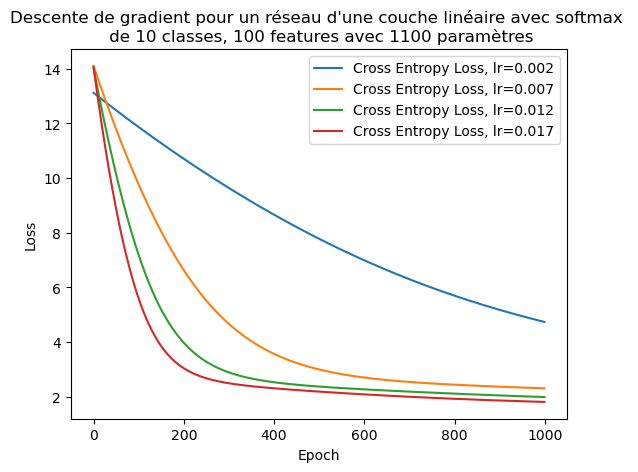

In [70]:

[plt.plot(np.arange(len(loss[i])),loss[i],label=f"Cross Entropy Loss, lr={lr_scope[i]:.3f}")for i in range(len(lr_scope))]

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Descente de gradient pour un réseau d'une couche linéaire avec softmax \n de {num_classes} classes, {num_features} features avec {(num_classes+1)*num_features} paramètres")
plt.legend()
plt.show()


In [84]:
num_classes = 10
num_samples = 6000
num_features = 100

X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=int(num_features/4),
    n_redundant=0,
    n_classes=num_classes,
    random_state=42
)

# make classification renvoie un vecteur y de la forme [1,0,2,0,....] 
#Ici on transforme y (one hot encoding) pour qu'il puisse être utilisé dans le caclul du gradient
y=np.eye(num_classes)[y]
import datetime

# Define the parameters of the algorithm.
nmax = 5000

loss =[]
num_ent=3
lr = 0.03
for ent in range(num_ent):
    print(f"Entrainement descente de gradient avec lr = {lr:.3f}")
    W = np.random.rand(num_features,num_classes)   
    b =np.random.rand(num_classes)

    # Start GD
    start_time = datetime.datetime.now()
    

    loss.append(gradient_descent(X,W,b,y,nmax,lr))
    end_time = datetime.datetime.now()

    # Print result
    execution_time = (end_time - start_time).total_seconds()
    print("GD: execution time={t:.3f} seconds".format(t=execution_time))


Entrainement descente de gradient avec lr = 0.030


100%|██████████| 5000/5000 [00:08<00:00, 580.93it/s]


GD: execution time=8.609 seconds
Entrainement descente de gradient avec lr = 0.030


100%|██████████| 5000/5000 [00:08<00:00, 620.30it/s]


GD: execution time=8.062 seconds
Entrainement descente de gradient avec lr = 0.030


100%|██████████| 5000/5000 [00:09<00:00, 549.92it/s]

GD: execution time=9.094 seconds


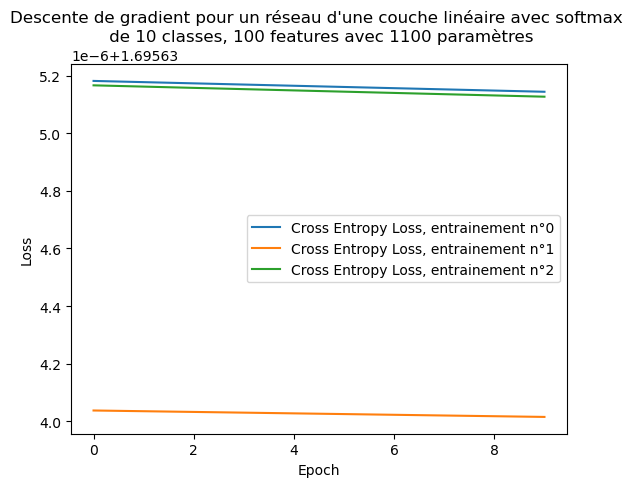

In [88]:
[plt.plot(np.arange(len(loss[i][4990:])),loss[i][4990:],label=f"Cross Entropy Loss, entrainement n°{i}")for i in range(num_ent)]

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Descente de gradient pour un réseau d'une couche linéaire avec softmax \n de {num_classes} classes, {num_features} features avec {(num_classes+1)*num_features} paramètres")
plt.legend()
plt.show()

### Stochastic gradient descent

Let us first define the gradient function that will be used next in the descent algorithm.

In [267]:


def network_output(X,W,b):
    Z = np.dot(X, W)+b
    exp_Z = np.exp(Z)
    network_output = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return network_output


def cross_entropy_loss(X,W,b,y):
    y_hat = network_output(X,W,b)
    cross_entropy_loss = -np.sum(y * np.log(y_hat)) / len(X)
    return cross_entropy_loss


def grad_cross_entropy(X,W,b,y):
    y_hat = network_output(X,W,b)
    gradient_W = np.dot(X.T, (y_hat- y)) / len(X)
    gradient_b = np.dot(np.ones(len(X)).T,  (y_hat-y))/len(X)
    


    return gradient_W,gradient_b

def grad_and_loss_cross_entropy(X,W,b,y):
    y_hat = network_output(X,W,b)
    cross_entropy_loss = -np.sum(y * np.log(y_hat)) / len(X)
    gradient_W = np.dot(X.T, (y_hat- y)) / len(X)
    gradient_b = np.dot(np.ones(len(X)).T,  (y_hat-y))/len(X)


    return gradient_W,gradient_b,cross_entropy_loss






def stoc_gradient_descent(X,W,b,y,num_epoch,lr,batch_size,num_samples,
                          stochastic =True,epoch_complete =True,verbose = True):
 

    if stochastic==False :
        batch_size=num_samples
   
    n_loop = int(num_samples/batch_size)
    loss = []
    if epoch_complete==False:
         n_loop=1
    for epoch in tqdm(range(num_epoch)):
        lra=lr
        for loop in range(n_loop):
        
            mini_batch_indices=np.random.choice(num_samples,batch_size, replace=False)
            
           
            stoch_grad_W,stoch_grad_b =grad_cross_entropy(X[mini_batch_indices,:]
                                                          ,W,b,y[mini_batch_indices][:])
        
           
            # update x through the gradient update
            W = W-lra*stoch_grad_W
            b = b - lra*stoch_grad_b# TO DO
        
            # store x and objective
         
        loss_epoch= cross_entropy_loss(X,W,b,y)
        loss.append(loss_epoch)
        if verbose == True:
             print(f"Epoch = {epoch}/{num_epoch},Cross entropy loss = {loss_epoch:.2f},
                    batch_size = {batch_size}/{num_samples}")
        
        
    return loss

In [245]:
import datetime

num_classes = 10
num_samples = 10000
num_features = 400


X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=num_features,
    n_redundant=0,
    n_classes=num_classes,
    random_state=42
)

# make classification renvoie un vecteur y de la forme [1,0,2,0,....] 
#Ici on transforme y (one hot encoding) pour qu'il puisse être utilisé dans le caclul du gradient
y=np.eye(num_classes)[y]



In [269]:


W = np.random.rand(num_features,num_classes)   
b =np.random.rand(num_classes)
# Define the parameters of the algorithm.
num_epoch = 100
lr=0.01
batch_size=128

# Initialization

loss_list = []


In [ ]:

# Start GD
W = np.random.rand(num_features,num_classes)   
b =np.random.rand(num_classes)
start_time = datetime.datetime.now()
loss = stoc_gradient_descent(
        X,W,b,y,num_epoch,lr,batch_size,num_samples,stochastic=False)
end_time = datetime.datetime.now()

# Print result
execution_time = (end_time - start_time).total_seconds()
loss_list.append(loss)
print("SGD: execution time={t:.3f} seconds".format(t=execution_time))
W = np.random.rand(num_features,num_classes)   
b =np.random.rand(num_classes)
start_time = datetime.datetime.now()
loss = stoc_gradient_descent(
        X,W,b,y,num_epoch,lr,batch_size,num_samples,stochastic=True)
end_time = datetime.datetime.now()

# Print result
execution_time = (end_time - start_time).total_seconds()
loss_list.append(loss)
print("SGD: execution time={t:.3f} seconds".format(t=execution_time))

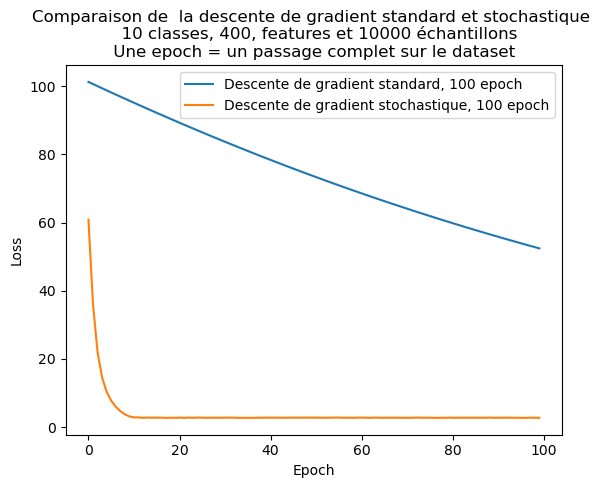

In [271]:

plt.plot(np.arange(len(loss_list[0])),loss_list[0],label=f"Descente de gradient standard, {num_epoch} epoch")

plt.plot(np.arange(len(loss_list[1])),loss_list[1],label=f"Descente de gradient stochastique, {num_epoch} epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Comparaison de  la descente de gradient standard et stochastique \n  {num_classes} classes, {num_features}, features et {num_samples} échantillons\n Une epoch = un passage complet sur le dataset ")
plt.legend()
plt.show()

In [274]:
num_epoch = 1000
lr=0.01
batch_size=124

loss_list_exp_2 =[]
W = np.random.rand(num_features,num_classes)   
b =np.random.rand(num_classes)
start_time = datetime.datetime.now()
loss = stoc_gradient_descent(
        X,W,b,y,num_epoch,lr,batch_size,num_samples,stochastic=False,verbose = False)
end_time = datetime.datetime.now()

# Print result
execution_time = (end_time - start_time).total_seconds()
loss_list_exp_2.append(loss)
print("SGD: execution time={t:.3f} seconds".format(t=execution_time))
W = np.random.rand(num_features,num_classes)   
b =np.random.rand(num_classes)
start_time = datetime.datetime.now()
loss = stoc_gradient_descent(
        X,W,b,y,num_epoch,lr,batch_size,num_samples,epoch_complete=False,verbose= False)
end_time = datetime.datetime.now()

# Print result
execution_time = (end_time - start_time).total_seconds()
loss_list_exp_2.append(loss)
print("SGD: execution time={t:.3f} seconds".format(t=execution_time))

100%|██████████| 1000/1000 [00:12<00:00, 77.00it/s]


SGD: execution time=12.990 seconds


100%|██████████| 1000/1000 [00:03<00:00, 277.69it/s]

SGD: execution time=3.603 seconds


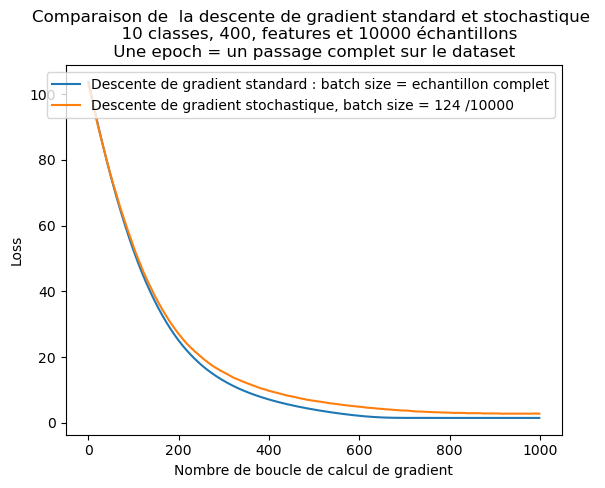

In [276]:
plt.plot(np.arange(len(loss_list_exp_2[0])),loss_list_exp_2[0],label=f"Descente de gradient standard : batch size = echantillon complet")

plt.plot(np.arange(len(loss_list_exp_2[1])),loss_list_exp_2[1],label=f"Descente de gradient stochastique, batch size = {batch_size} /{num_samples}")
plt.xlabel("Nombre de boucle de calcul de gradient")
plt.ylabel("Loss")
plt.title(f"Comparaison de  la descente de gradient standard et stochastique \n  {num_classes} classes, {num_features}, features et {num_samples} échantillons\n Une epoch = un passage complet sur le dataset ")
plt.legend()
plt.show()